# Manipulation de Data Frame

## Importation de la bibliothèque 

La bibliothèque en question s'appelle **Pandas**.
On l'importe comme toute bibliothèque et on la renomme **pd** en général :

On aura aussi besoin de la bibliothèque **Numpy** (qu'on va renommé **np**)




In [82]:
# importer Numpy et Pandas
import pandas as pd
import numpy as np

## Création
Il est possible de créer un DataFrame à partir d'un tableau Numpy.


In [83]:
# céer un tableau numpy (3 lignes 4 colonnes) avec des valeurs aléatoires comprises entre 10 et 100
data = np.random.randint(10, 100, (3, 4))
data

array([[88, 37, 27, 11],
       [20, 47, 13, 23],
       [66, 42, 46, 47]])

La fonction [pandas.DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) permet de créer un DataFrame à partir du tableau data

In [84]:
# créer un DataFrame à partir du tableau data 
df = pd.DataFrame(data)
df

,0,1,2,3
0,88,37,27,11
1,20,47,13,23
2,66,42,46,47


In [85]:
# créer deux listes ind_ligne et ind_col
# ind_ligne contiendra les 'Apple' 'Facebook' et 'Amazon'
# ind_col contiendra 'T1','T2','T3' et 'T4'
ind_line = ['Apple','Facebook','Amazon']
ind_col = ['T1','T2','T3','T4']

In [86]:
# recréer le DataFrame avec les bons indexes 
df = pd.DataFrame(data, index=ind_line, columns=ind_col)
df

,T1,T2,T3,T4
Apple,88,37,27,11
Facebook,20,47,13,23
Amazon,66,42,46,47


In [87]:
Df = pd.DataFrame({'Yes': [5,2],'No': [12,6]})
Df

,Yes,No
0,5,12
1,2,6


In [88]:
Df = pd.DataFrame( {'Yes': [5,2],'No': [12,6]} , index = ['Option A', 'Option B'])
Df

,Yes,No
Option A,5,12
Option B,2,6


On peut aussi créer des "Séries", si le DataFrame est un tableau, la série est la liste.

In [89]:
S = pd.Series([6, 6, 3, 1, 5])
S

0    6
1    6
2    3
3    1
4    5
dtype: int64

On peut aussi l'indexer

In [90]:
S = pd.Series([52,43,11], index = ['Team A', 'Team B', 'Team C'], name = 'Team Points')
S

Team A    52
Team B    43
Team C    11
Name: Team Points, dtype: int64

## Copie

In [91]:
# copier le data frame 
df2 = df.copy()
df2

,T1,T2,T3,T4
Apple,88,37,27,11
Facebook,20,47,13,23
Amazon,66,42,46,47


In [92]:
# copier une colonne
df2['T4bis'] = df2['T4']
df2

,T1,T2,T3,T4,T4bis
Apple,88,37,27,11,11
Facebook,20,47,13,23,23
Amazon,66,42,46,47,47


## Sélection

In [93]:
# Nan : not a number
df.isna()

,T1,T2,T3,T4
Apple,False,False,False,False
Facebook,False,False,False,False
Amazon,False,False,False,False


In [94]:
# on calcule le nombre de NaN par colonne
df.isna().sum()

T1    0
T2    0
T3    0
T4    0
dtype: int64

In [95]:
# localiser les éléments par indice de position
df.iloc[:1]

,T1,T2,T3,T4
Apple,88,37,27,11


In [96]:
# récupérer la première ligne
df.iloc[0]

T1    88
T2    37
T3    27
T4    11
Name: Apple, dtype: int64

In [97]:
df

,T1,T2,T3,T4
Apple,88,37,27,11
Facebook,20,47,13,23
Amazon,66,42,46,47


In [98]:
# récupérer la première colonne
df.iloc[:,0]

Apple       88
Facebook    20
Amazon      66
Name: T1, dtype: int64

In [99]:
# localiser les éléments par label de position
df.loc[:"Apple"]

,T1,T2,T3,T4
Apple,88,37,27,11


In [100]:
df.loc[:,["T1","T2"]]

,T1,T2
Apple,88,37
Facebook,20,47
Amazon,66,42


Choisir entre loc et iloc :

iloc utilise le schéma d'indexation Python stdlib, où le premier élément du
la plage est incluse et la dernière exclue. Ainsi 0:10 sélectionnera les entrées 0,...,9.

loc, quant à lui, indexe inclusivement. Ainsi 0:10 sélectionnera les entrées 0,...,10.

# Sélectioner Sous Conditions

In [101]:
# Renvoie une série de booléen
df.T1 == 27 

Apple       False
Facebook    False
Amazon      False
Name: T1, dtype: bool

In [102]:
# Renvoie que les lignes où T1 vaut 59
df.loc[df.T1 == 59]

,T1,T2,T3,T4


In [103]:
# Renvoie que les lignes où la valeur de T1 est dans la liste donnée
df.loc[df.T1.isin([59,27])]

,T1,T2,T3,T4


In [104]:
dict = {'T1': [100, np.nan, 95],
        'T2': [30, 45, np.nan],
        'T3': [40, 80, 98],
        'T4': [152,120,np.nan]}
df3 = pd.DataFrame(dict)
df3

,T1,T2,T3,T4
0,100.0,30.0,40,152.0
1,NaN,45.0,80,120.0
2,95.0,NaN,98,NaN


In [105]:
df3.loc[df3.T2.notnull()]

,T1,T2,T3,T4
0,100.0,30.0,40,152.0
1,NaN,45.0,80,120.0


In [106]:
df3.loc[df3.T2.isnull()]

,T1,T2,T3,T4
2,95.0,NaN,98,NaN


## Informations sur dataframe
Il est possible d'obtenir les informations sur les colonnes grâce à [df.info](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.info.html).




In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, Apple to Amazon
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   T1      3 non-null      int64
 1   T2      3 non-null      int64
 2   T3      3 non-null      int64
 3   T4      3 non-null      int64
dtypes: int64(4)
memory usage: 228.0+ bytes


In [108]:
df.describe()

,T1,T2,T3,T4
count,3.000000,3.0,3.000000,3.000000
mean,58.000000,42.0,28.666667,27.000000
std,34.698703,5.0,16.563011,18.330303
min,20.000000,37.0,13.000000,11.000000
25%,43.000000,39.5,20.000000,17.000000
50%,66.000000,42.0,27.000000,23.000000
75%,77.000000,44.5,36.500000,35.000000
max,88.000000,47.0,46.000000,47.000000


## Importation du data Frame

La première étape est d'identifier le type de fichier.

Il existe plusieurs extensions de fichiers:

1.   Les .csv (fichier textes où les éléments sont séparés par des virgules). Ce sont les fichiers qui sont le plus utilisés.

2.   Les .xls, les .json etc...

On importe les fichiers csv grâce à la fonction [pandas.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).
Les fichiers .xls grâce à la fonction  [pandas.read_table](https://pandas.pydata.org/docs/reference/api/pandas.read_table.html).


[pandas.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) prend en argument le chemin du fichier (ou juste son nom s'il se situe dans le même dossier que le fichier code), le type de séparation, l'option d'affichage et encore pleins d'autres éléments qui sont développés dans la documentation.

Les attributs [head](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) et [tail](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html) permettent d'afficher les premières et les dernières données.

Nous allons travailler avec la base de données du Titanic


















In [109]:
# importation des données
df_titanic = pd.read_csv("titanic.csv")

In [110]:
# connaître les dimensions de notre data frame
df_titanic.shape

(891, 12)

In [111]:
# afficher les types
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [112]:
# visualisation des 5 premières lignes
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [113]:
# si on veut préciser le nombre de lignes
df_titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [114]:
# Visualisation des 5 dernières données
df_titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [115]:
# si on veut préciser le nombre de lignes
df_titanic.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Manipulation d'un DataFrame



In [116]:
# voir il y a combien de valeurs manquantes pour chaque colonne
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [134]:
# on veut changer la colonne Sex de valeurs {'male','female'} en {0,1}
df_titanic['Sex'] = df_titanic.loc[:,'Sex'].apply(lambda x: 1 if(x=='male') else 2)
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",2,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",2,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",2,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",2,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",2,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",2,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",2,26.000000,0,0,111369,30.0000,C


In [132]:
# meme chose que apply
df_titanic['Sex'] = df_titanic.loc[:,'Sex'].map(lambda x: 1 if(x=='male') else 2)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",2,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",2,35.0,0,0,373450,8.0500,S


In [118]:
# la colonne Cabin contient beaucoup de valeurs manquantes on la supprime
df_titanic.drop('Cabin', inplace=True, axis=1)
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",2,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",2,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C


In [147]:
# on remplace les valeurs manquantes dans Age par la moyenne
df_titanic['Age'].fillna(df_titanic['Age'].mean(), inplace=True)

In [148]:
# on élimine les 2 lignes contenant Nan dans Embarked
df_titanic.dropna(inplace=True)

In [149]:
# on veut connaitre la moyennes des ages des personnes qui ont survécu
df_titanic[df_titanic['Survived'] == 1].Age.mean()

28.423600346020756

In [127]:
# Pourcentage de survivants
df_titanic['Survived'].mean()

0.38245219347581555

In [150]:
# Nombre de personne par age
df_titanic.Age.value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64

Récap de fonction:

**describe():** renvoie un résumé du data set

**mean():** renvoie la moyenne

**unique():** renvoie une liste de valeur unique

**value_count():** renvoie une liste de valeur unique et le nombre d'occurence de chacune des valeurs

## Tri et Groupement

In [140]:
Embark = df_titanic.groupby('Embarked').PassengerId.count()
Embark

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64

In [144]:
df_titanic.groupby('Age').Age.count()

Age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: Age, Length: 89, dtype: int64

In [159]:
df_titanic.groupby(['Embarked']).Age.agg([len, min, np.mean, max])

,len,min,mean,max
Embarked,,,,
C,168,0.42,30.562419,71.0
Q,77,2.00,29.113724,70.5
S,644,0.67,29.480855,80.0


In [146]:
df_titanic.groupby('Age').Age.count().sort_values(ascending=False)

Age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
30.000000     25
            ... 
20.500000      1
14.500000      1
12.000000      1
0.920000       1
80.000000      1
Name: Age, Length: 89, dtype: int64

In [161]:
df_titanic.sort_values(by = 'Name')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
845,846,0,3,"Abbing, Mr. Anthony",2,42.000000,0,0,C.A. 5547,7.5500,S
746,747,0,3,"Abbott, Mr. Rossmore Edward",2,16.000000,1,1,C.A. 2673,20.2500,S
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",2,35.000000,1,1,C.A. 2673,20.2500,S
308,309,0,2,"Abelson, Mr. Samuel",2,30.000000,1,0,P/PP 3381,24.0000,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",2,28.000000,1,0,P/PP 3381,24.0000,C
...,...,...,...,...,...,...,...,...,...,...,...
286,287,1,3,"de Mulder, Mr. Theodore",2,30.000000,0,0,345774,9.5000,S
282,283,0,3,"de Pelsmaeker, Mr. Alfons",2,16.000000,0,0,345778,9.5000,S
361,362,0,2,"del Carlo, Mr. Sebastiano",2,29.000000,1,0,SC/PARIS 2167,27.7208,C
153,154,0,3,"van Billiard, Mr. Austin Blyler",2,40.500000,0,2,A/5. 851,14.5000,S


## Visualisation des données

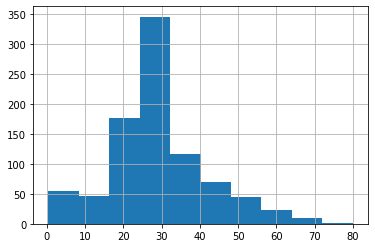

In [124]:
# histogramme
hist = df_titanic['Age'].hist()

In [125]:
# les corrélations
df_titanic.corr()
# pas de corrélation ici

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,-0.043136,0.030300,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,0.541585,-0.074673,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.127741,-0.327954,0.081656,0.016824,-0.548193
Sex,-0.043136,0.541585,-0.127741,1.000000,-0.089434,0.116348,0.247508,0.179958
Age,0.030300,-0.074673,-0.327954,-0.089434,1.000000,-0.231875,-0.178232,0.088604
SibSp,-0.057686,-0.034040,0.081656,0.116348,-0.231875,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,0.247508,-0.178232,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.179958,0.088604,0.160887,0.217532,1.000000
